In [14]:
import pandas as pd
#A1 data exploration

In [36]:
data = pd.read_excel("19CSE305_LabData_Set3.1.xlsx",sheet_name="thyroid0387_UCI")
print(data.head())

attribute_names = data.columns
print("Attribute Names:")
print(attribute_names)

data_types = data.dtypes
print("\nData Types:")
print(data_types)



numerical_attributes = data.select_dtypes(include=['int64', 'float64'])
summary_statistics = numerical_attributes.describe()
print("\nSummary Statistics for Numerical Attributes:")
print(summary_statistics)


categorical_attributes = data.select_dtypes(include=['object'])
for column in categorical_attributes.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()
    print(f"\nUnique Values for '{column}':")
    print(unique_values)
    print(f"\nValue Counts for '{column}':")
    print(value_counts)



   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

In [37]:

numeric_variables = data.select_dtypes(include=[np.number])
data_range = numeric_variables.max() - numeric_variables.min()
print("\nData Range for Numeric Variables:")
print(data_range)


Data Range for Numeric Variables:
Record ID    230019
age              96
dtype: int64


In [38]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64


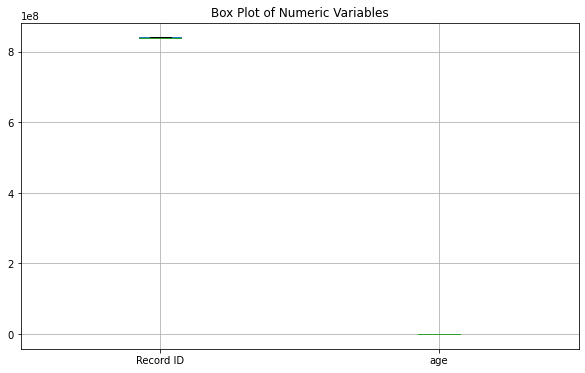

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
numeric_variables.boxplot()
plt.title("Box Plot of Numeric Variables")
plt.show()

In [40]:
mean_values = numeric_variables.mean()
variance_values = numeric_variables.var()
print("\nMean for Numeric Variables:")
print(mean_values)
print("\nVariance for Numeric Variables:")
print(variance_values)


Mean for Numeric Variables:
Record ID    8.409340e+08
age          5.150900e+01
dtype: float64

Variance for Numeric Variables:
Record ID    5.819759e+09
age          3.525585e+02
dtype: float64


In [46]:
numeric = 'numeric column'

# Check if the column exists in the dataset
if numeric in data.columns:
    # Calculate the median of the numeric column
    median_value = data[numeric].median()

    # Fill missing values with the median
    data[numeric].fillna(median_value, inplace=True)

    # Check if there are any remaining missing values
    missing_values = data.isnull().sum()
    print("Missing Values After Imputation:")
    print(missing_values)
else:
    print(f"'{numeric}' does not exist in the dataset.")


'numeric column' does not exist in the dataset.


In [44]:
import pandas as pd

# Verify the correct column name
categorical_column = 'categorical_column'

# Check if the column exists in the dataset
if categorical_column in data.columns:
    # Calculate the mode of the categorical column
    mode_value = data[categorical_column].mode().iloc[0]

    data[categorical_column].fillna(mode_value, inplace=True)

    # Check if there are any remaining missing values
    missing_values = data.isnull().sum()
    print("Missing Values After Imputation:")
    print(missing_values)
else:
    print(f"'{categorical_column}' does not exist in the dataset.")


'categorical_column' does not exist in the dataset.


In [32]:
#A3
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.DataFrame({
    'attribute1': [10, 100, 1000, 0.1, 1],
    'attribute2': [5, 50, 500, 0.05, 0.5]
})

attributes_to_normalize = ['attribute1', 'attribute2']


min_max_scaler = MinMaxScaler()
data[attributes_to_normalize] = min_max_scaler.fit_transform(data[attributes_to_normalize])

standard_scaler = StandardScaler()
data[attributes_to_normalize] = standard_scaler.fit_transform(data[attributes_to_normalize])


print("Normalized Data:")
print(data)


Normalized Data:
   attribute1  attribute2
0   -0.543193   -0.543193
1   -0.312831   -0.312831
2    1.990787    1.990787
3   -0.568533   -0.568533
4   -0.566229   -0.566229


In [31]:
#A4
vector1 = [1, 0, 1, 0, 1]
vector2 = [0, 1, 1, 1, 0]


f11 = sum([1 for x, y in zip(vector1, vector2) if x == 1 and y == 1])
f01 = sum([1 for x, y in zip(vector1, vector2) if x == 0 and y == 1])
f10 = sum([1 for x, y in zip(vector1, vector2) if x == 1 and y == 0])
f00 = sum([1 for x, y in zip(vector1, vector2) if x == 0 and y == 0])


jc = f11 / (f01 + f10 + f11)

smc = (f11 + f00) / (f00 + f01 + f10 + f11)

# Print the results
print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)


Jaccard Coefficient (JC): 0.2
Simple Matching Coefficient (SMC): 0.2


In [34]:
import numpy as np

data = [
    [1, 0.2, 0.5, 0.3],
    [0.5, 0.7, 0.8, 0.9],
 
]

vector1 = np.array(data[0])
vector2 = np.array(data[1])

dot_product = np.dot(vector1, vector2)

norm_vector1 = np.linalg.norm(vector1)
norm_vector2 = np.linalg.norm(vector2)

cosine_similarity = dot_product / (norm_vector1 * norm_vector2)

print("Cosine Similarity:", cosine_similarity)


Cosine Similarity: 0.7535458719368691


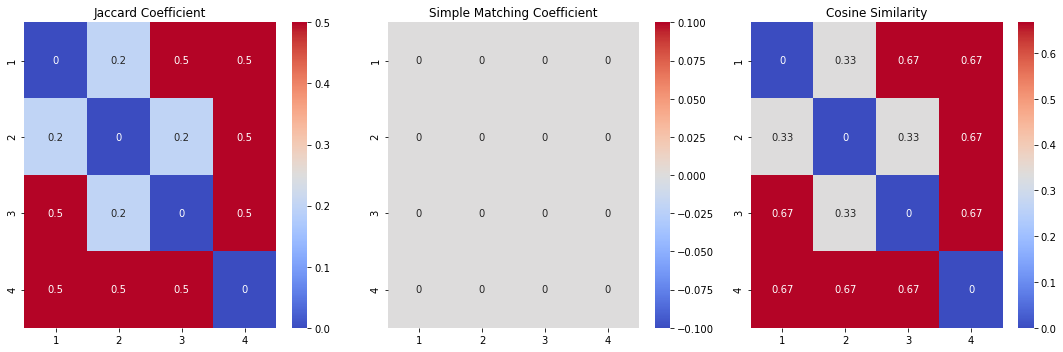

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity


data = [
    [1, 0, 1, 0, 1],
    [0, 1, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1],
 
]


vectors = data[:20]


num_vectors = len(vectors)
jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))


for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            jc = jaccard_score(vectors[i], vectors[j])
            jc_matrix[i, j] = jc
            smc = np.mean(vectors[i] == vectors[j])
            smc_matrix[i, j] = smc
            cos = cosine_similarity([vectors[i]], [vectors[j]])[0][0]
            cos_matrix[i, j] = cos

jc_df = pd.DataFrame(jc_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))
smc_df = pd.DataFrame(smc_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))
cos_df = pd.DataFrame(cos_matrix, columns=range(1, num_vectors + 1), index=range(1, num_vectors + 1))


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(jc_df, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Jaccard Coefficient')

sns.heatmap(smc_df, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Simple Matching Coefficient')

sns.heatmap(cos_df, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Cosine Similarity')

plt.tight_layout()
plt.show()
